**Analysis on ML Test Scores**

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/scores_data.csv')

In [3]:
#Cleaning Column Names
df.columns = df.columns.str.strip()

In [4]:
#Extracting Numerical Scores
df['score'] = df['Score'].str.extract(r'(\d+)').astype(int)
df['max_score'] = df['Score'].str.extract(r'/\s*(\d+)').astype(int)

In [5]:
print("Dataset Shape:", df.shape)
print("\nBatch-wise Count:")
print(df['Batch'].value_counts())

Dataset Shape: (149, 5)

Batch-wise Count:
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


In [6]:
#Batch-wise Descriptive Statistics
batch_stats = (df.groupby('Batch')['score'].agg(students='count', mean_score='mean', median_score='median', min_score='min', max_score='max').round(2))

In [7]:
print("\nBatch-wise Statistics:")
print(batch_stats)


Batch-wise Statistics:
            students  mean_score  median_score  min_score  max_score
Batch                                                               
AI_ELITE_4        48        3.79           4.0          0          7
AI_ELITE_6        48        4.23           4.0          0          7
AI_ELITE_7        53        5.06           5.0          2          7


In [8]:
#Score Distribution per Batch
score_distribution = (df.groupby(['Batch', 'score']).size().unstack(fill_value=0))

In [9]:
print("\nScore Distribution:")
print(score_distribution)


Score Distribution:
score       0  1  2  3   4   5   6   7
Batch                                 
AI_ELITE_4  1  1  7  8  19   8   1   3
AI_ELITE_6  1  2  3  9  11  13   4   5
AI_ELITE_7  0  0  2  7  10  11  13  10


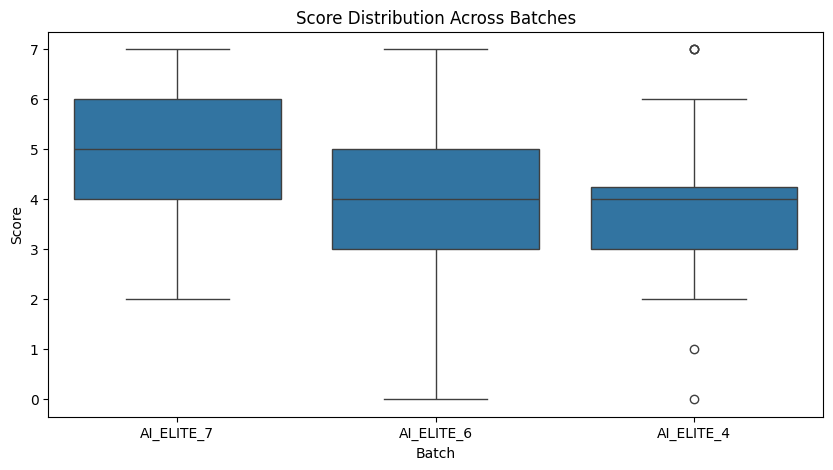

In [10]:
#Data Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Batch', y='score')
plt.title('Score Distribution Across Batches')
plt.ylabel('Score')
plt.xlabel('Batch')
plt.show()

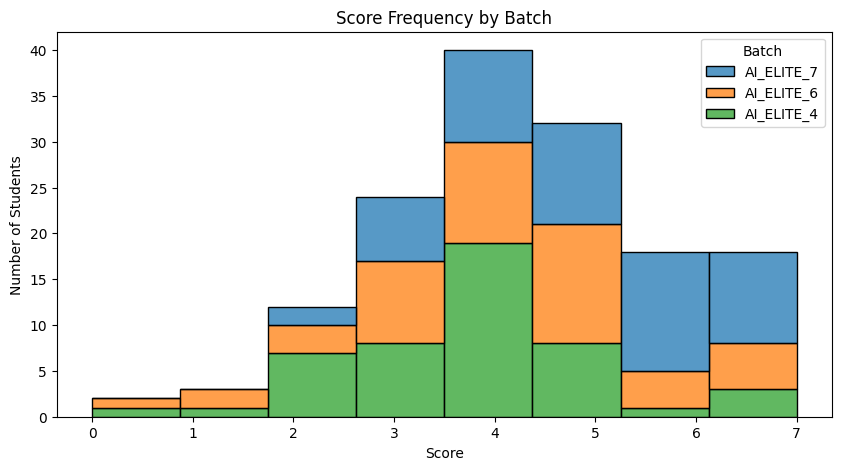

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='score', hue='Batch', multiple='stack', bins=8)
plt.title('Score Frequency by Batch')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

In [12]:
#AI_ELITE_4
#Observation: It has the lowest mean score and includes very low scorers.
#Insight: This batch shows weak foundational understanding and requires concept reinforcement.

In [13]:
#AI_ELITE_6
#Observation: It has a moderate mean score with balanced score distribution.
#Insight: Learners demonstrate reasonable understanding with scope for improvement through practice.

In [14]:
#AI_ELITE_7
#Observation: It records the highest mean and most consistent high scores.
#Insight: This batch exhibits strong conceptual clarity and readiness for advanced ML topics.

In [15]:
#Overall
#Observation: Average scores and consistency improve across batches from AI_ELITE_4 to AI_ELITE_7.
#Insight: There is a clear progression in learning maturity and performance outcomes.